<a href="https://colab.research.google.com/github/astrocrazy/Data-Challenges/blob/master/DataChallenge_W7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal**
You work for a data science consulting company. A major video game production company has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below) and, as a first project, would like to know:

*What are some major differences between the North American, European, and Japanese video game markets?*

*What video game genres are trending in each market?*

*What features about a video game are most indicative of its success?* 

---


**The Data**
The dataset contains a list of video games with sales greater than 100,000 copies.

Rank - Ranking of overall sale

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.


###Import Functions

In [0]:
from google.colab import files
import pandas as pd
import numpy as np
import pandas_profiling as pp

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import accuracy_score

###Data Input

In [3]:
file = files.upload()

Saving vgsales.csv to vgsales.csv


In [4]:
#read in data using pandas
df = pd.read_csv('vgsales.csv')
#check data has been read in properly
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


###Pre-processing

Set the index to the Rank values

In [0]:
df = df.set_index("Rank")

In [0]:
pfr = pp.ProfileReport(df)
pfr.to_file("Video_Game_Sales.html")

In [0]:
pfr

Number of variables,11
Number of observations,16598
Total Missing (%),0.2%
Total size in memory,1.4 MiB
Average record size in memory,88.0 B
Numeric,6
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,1


From the profile we can understand that there is one video game released in year 2020, which is not possible. So we change that to the correct date after getting the value from online.

In [14]:
year_data = df['Year']
print("Max Year Value: ", year_data.max())

Max Year Value:  2020.0


In [15]:
max_yr = year_data.idxmax()
print(max_yr)


5959


In [0]:
df.loc[5959]

Name            Imagine: Makeup Artist
Platform                            DS
Year                              2009
Genre                       Simulation
Publisher                      Ubisoft
NA_Sales                          0.27
EU_Sales                             0
JP_Sales                             0
Other_Sales                       0.02
Global_Sales                      0.29
Name: 5959, dtype: object

In [0]:
df['Year'] = df['Year'].replace(2020.0, 2009.0)

In [17]:
df["Year"].max()

2017.0

In [0]:
print("Number of games: ", len(df))
print("Number of publishers: ",len(df['Publisher'].unique()))

Number of games:  16598
Number of publishers:  579


Drop the null values


In [0]:
df = df.dropna()

###EDA

In [0]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.404886,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.831475,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


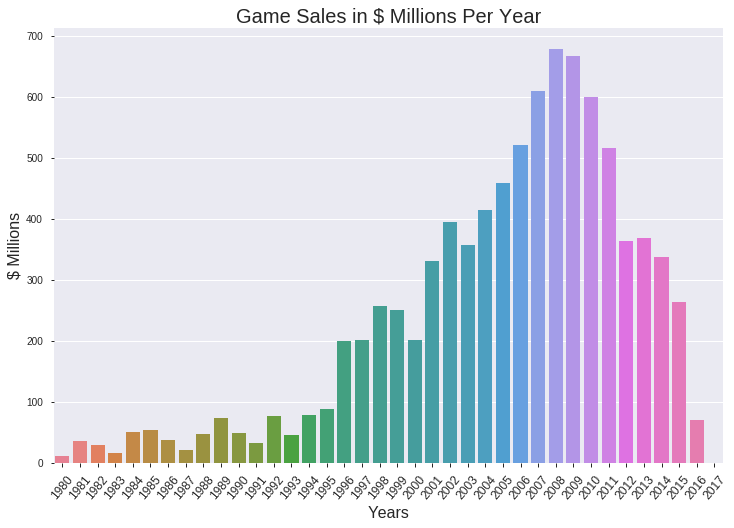

In [0]:
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x,palette="husl")
ax.set_xlabel(xlabel='Years', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='Fig 1:Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

There seems to be a maximum revenue for the year 2008. However, this can also be the result of cumulative or aggregate sales data that we have. Lets now group by Genre and see the results

In [0]:
Genre_Grp = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].groupby(df['Genre']).sum()

In [0]:
f = lambda x: round(100 * x / Genre_Grp['Global_Sales'],1)

Convert the raw values to % of Global Sales so that we can compare it easily.

In [0]:
Genre_Grp[["NA%","EU%","JP%","Other %"]]= Genre_Grp[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(f)

In [0]:
Genre_Grp

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA%,EU%,JP%,Other %
Genre,,,,,,,,,
Action,861.77,516.48,158.65,184.92,1722.84,50.0,30.0,9.2,10.7
Adventure,101.93,63.74,51.99,16.70,234.59,43.5,27.2,22.2,7.1
Fighting,220.74,100.00,87.15,36.19,444.05,49.7,22.5,19.6,8.1
Misc,396.92,211.77,106.67,73.92,789.87,50.3,26.8,13.5,9.4
Platform,445.99,200.65,130.65,51.51,829.13,53.8,24.2,15.8,6.2
Puzzle,122.01,50.52,56.68,12.47,242.21,50.4,20.9,23.4,5.1
Racing,356.93,236.31,56.61,76.68,726.76,49.1,32.5,7.8,10.6
Role-Playing,326.50,187.57,350.29,59.38,923.83,35.3,20.3,37.9,6.4
Shooter,575.16,310.45,38.18,101.90,1026.20,56.0,30.3,3.7,9.9


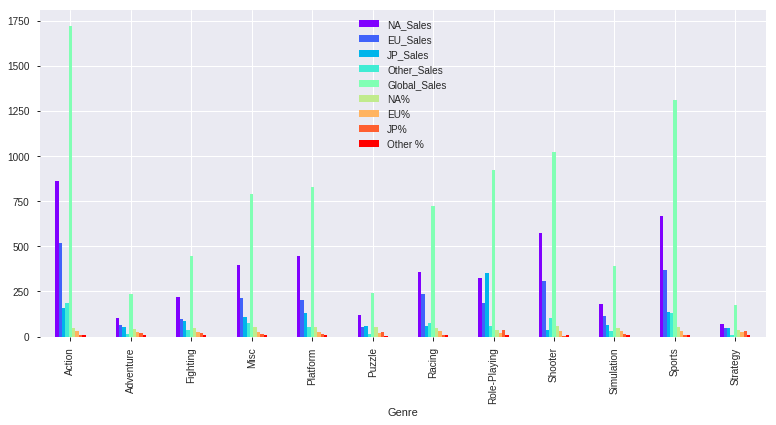

In [0]:
Genre_Grp.plot(kind='bar', colormap= 'rainbow', figsize=(13, 6) )

Text(0, 0.5, '% of Global Sales')

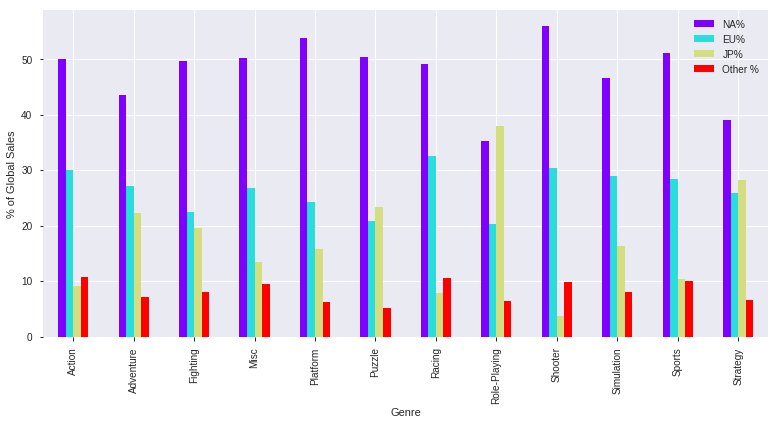

In [0]:
Genre_Grp[["NA%","EU%","JP%","Other %"]].plot(kind='bar', colormap= 'rainbow', figsize=(13, 6) )
plt.ylabel("% of Global Sales", fontsize=14)
ax.set_title(label='Fig 2:Genre distribution against global sales', fontsize=20)

**From the above graph, we can see that**

**Shooting** games dominate the NA Sales

**Racing** Games in EU

**Role Playing**  in Japan

Sales in the other region is equally divided between **Action, Racing, Shooting and Sports. ** 

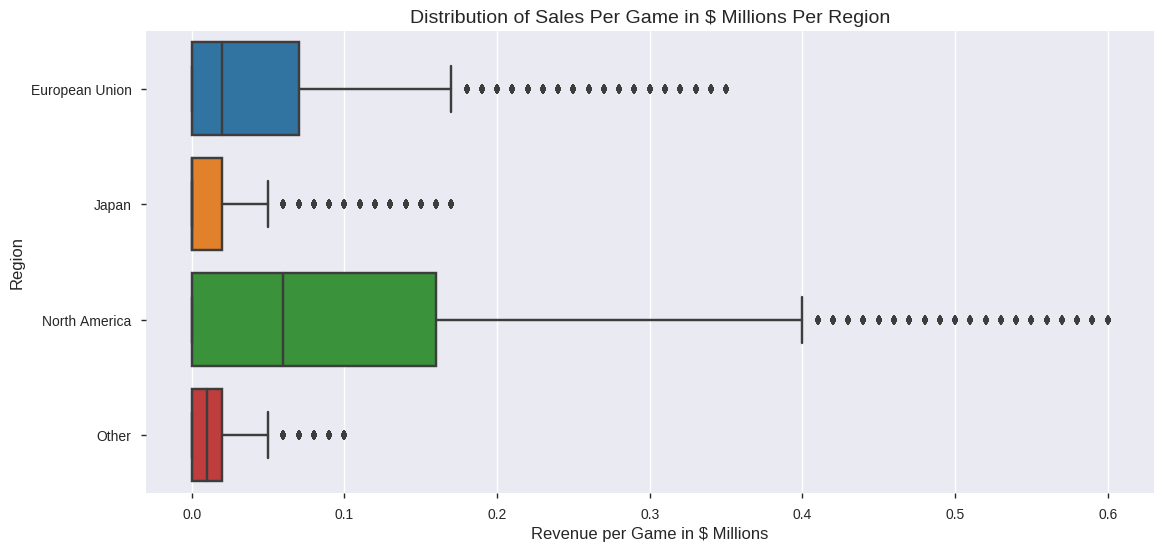

In [0]:
data = df
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(13,6))

colors = sns.color_palette("Set1", len(data))
ax = sns.boxplot(data=data, orient='h')
ax.set_xlabel(xlabel='Revenue per Game in $ Millions', fontsize=12)
ax.set_ylabel(ylabel='Region', fontsize=12)
ax.set_title(label='Distribution of Sales Per Game in $ Millions Per Region', fontsize=14)
ax.set_yticklabels(labels=regions, fontsize=10)
plt.show()

From the above plot of the distribution of game sales by region. To do this we create a data variable which has, as columns, region and has entries for each game (all 16598) in the same was as above, just without using .sum() and by adding .T ("transpose" which swaps rows for columns).

We also create the variable "q" so that we can select only the data that falls within the 90th percentile, which excludes outliers, making it easier for us to observe the distribution of the majority of our data.

In [0]:
Pub_Grp = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].groupby(df['Publisher']).sum()

In [0]:
Pub_Grp

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1C Company,0.01,0.07,0.00,0.02,0.10
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94
2D Boy,0.00,0.03,0.00,0.01,0.04
3DO,6.48,3.04,0.00,0.63,10.12
49Games,0.00,0.04,0.00,0.00,0.04
505 Games,31.83,16.43,2.05,5.44,55.91
5pb,0.02,0.00,1.61,0.00,1.63
7G//AMES,0.00,0.06,0.00,0.00,0.08


In [0]:
Pub_Grp.shape

(576, 5)

Text(0.5, 0, 'Number of Publishers')

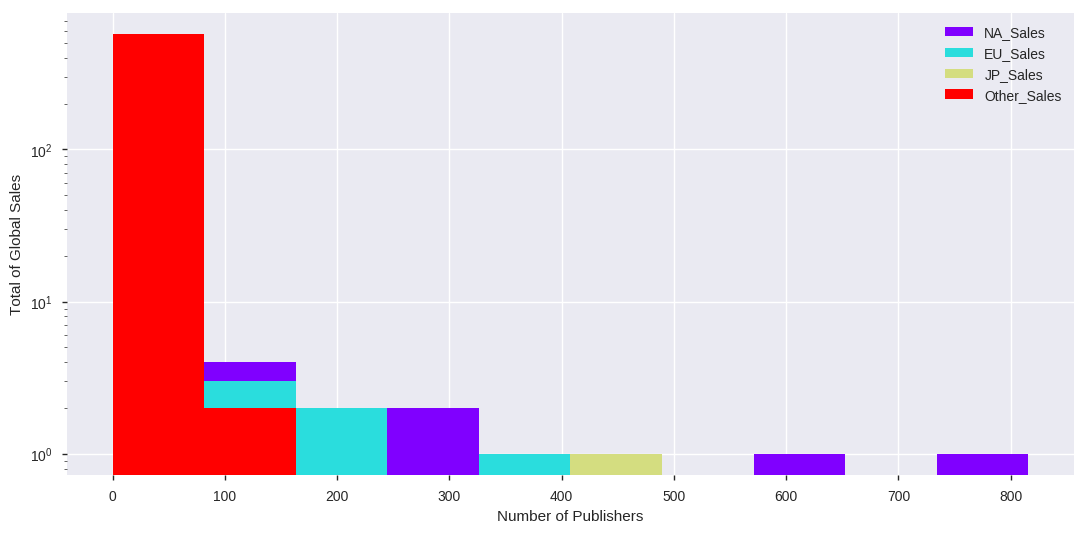

In [0]:
Pub_Grp[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].plot(kind='hist', colormap= 'rainbow', figsize=(13, 6),log=True )
plt.ylabel("Total of Global Sales")
plt.xlabel("Number of Publishers")

The maximum revenue is obtained from the sales in the other market, even though the number of publishers is the smallest. Eventhough NA has the highest number of publishers, it doesnt contribute much to the global sales revenue.

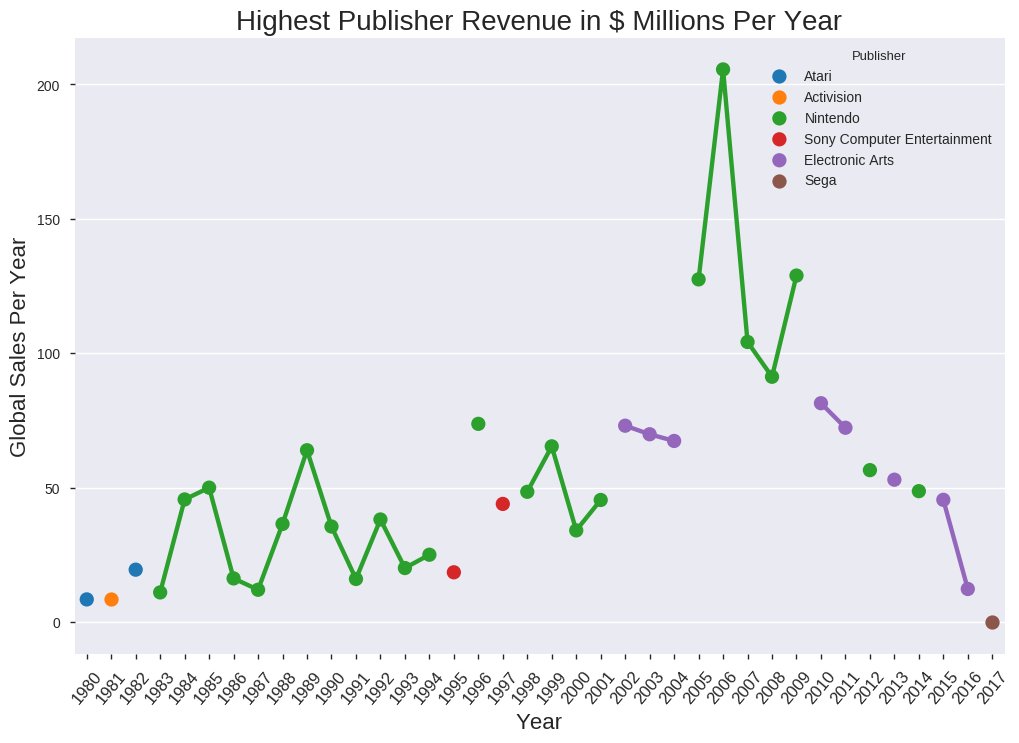

In [0]:
table = df.pivot_table('Global_Sales', index='Publisher', columns='Year', aggfunc='sum')
publishers = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([publishers, sales], axis=1)
data.columns = ['Publisher', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Publisher', data=data, size=15)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Publisher Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

In [0]:
def turn_off_labels(ax, first=True):
    if first == False:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)
        y_axis = ax.axes.get_yaxis()
        y_axis.set_visible(False)
    else:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)

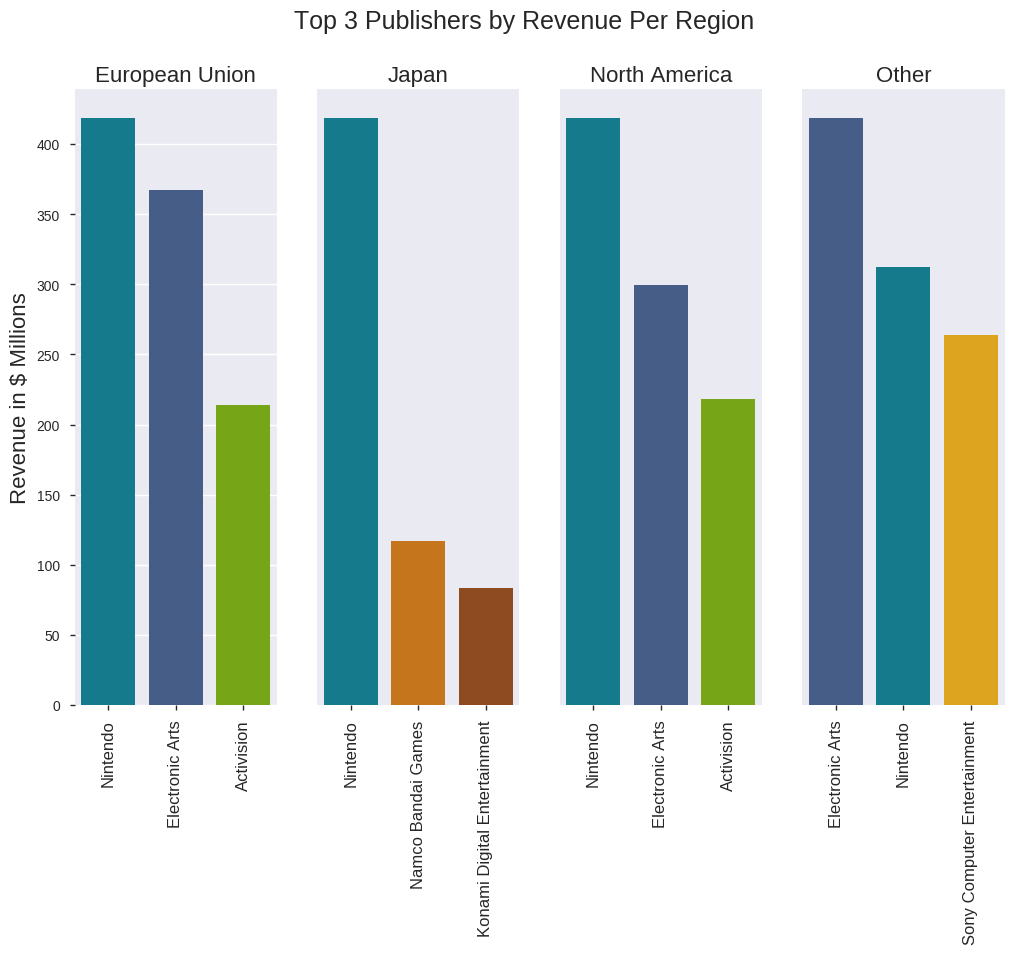

In [0]:
EU = df.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_publishers = EU.index

JP = df.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_publishers = JP.index

NA = df.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_publishers = NA.index

Other = df.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_publishers = Other.index

colors =  {'Nintendo':sns.xkcd_rgb["teal blue"], 'Electronic Arts':sns.xkcd_rgb["denim blue"], 'Activision':sns.xkcd_rgb["dark lime green"], 'Namco Bandai Games':sns.xkcd_rgb["pumpkin"], 'Konami Digital Entertainment':sns.xkcd_rgb["burnt umber"], 'Sony Computer Entertainment':sns.xkcd_rgb["yellow orange"]}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_publishers, rotation=90, size=12)
turn_off_labels(ax1)
sns.barplot(x=EU_publishers, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=16)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = JP_publishers, rotation=90, size=12)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_publishers, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=16)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = NA_publishers, rotation=90, size=12)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_publishers, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=16)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_publishers, rotation=90, size=12)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_publishers, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=16)
plt.suptitle('Top 3 Publishers by Revenue Per Region', size=18)
plt.show();


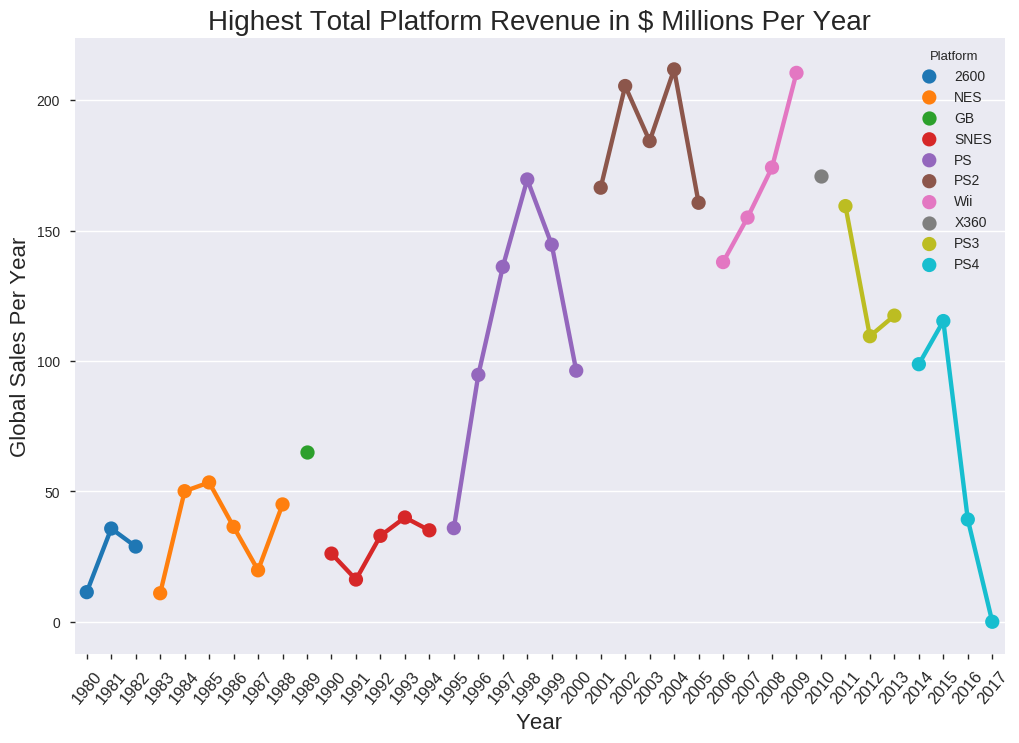

In [0]:
table = df.pivot_table('Global_Sales', index='Platform', columns='Year', aggfunc='sum')
platforms = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([platforms, sales], axis=1)
data.columns = ['Platform', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Platform', data=data, size=15)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Total Platform Revenue in $ Millions Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

Convert Categories to Variable

In [0]:
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        #x_train.drop(c,axis=1,inplace=True)

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

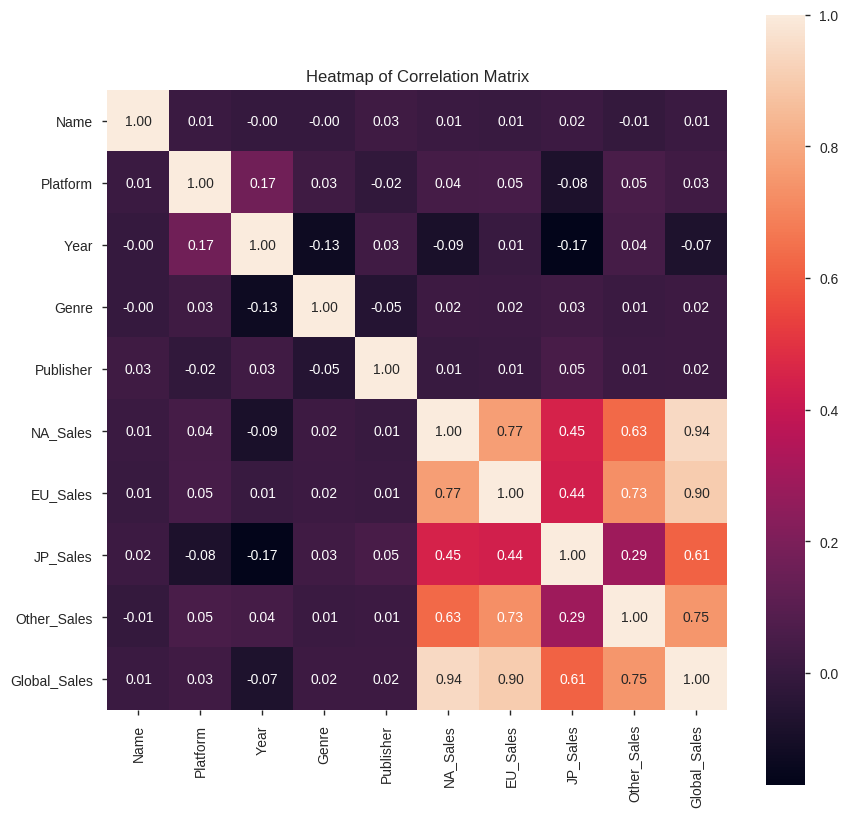

In [0]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 10},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
ax.set_title('Heatmap of Correlation Matrix')

To get a first pass on understanding what defines the success of a video game, I am using all the features except Sales figues, in this case, the global sales figures, in the training dataframe

##Modelling

In [0]:
df2 = df #keep a copy

In [0]:
df3 = df[["Name","Platform","Year","Genre","Publisher","Global_Sales"]]

In [0]:
y = df3["Global_Sales"]

In [0]:
x=df3.drop('Global_Sales',axis=1)

Split the data into train and test, in the ratio 80:20

In [0]:
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=0)

In [0]:
train_x.shape,test_x.shape

((13032, 5), (3259, 5))

In [0]:
label = ["Name","Platform","Year","Genre","Publisher"]

Use Random forest to identify feature importance

In [0]:
# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the classifier
clf.fit(train_x,train_y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
# Print the name and gini importance of each feature
for feature in zip(label, clf.feature_importances_):
    print(feature)

('Name', 0.5427173731115862)
('Platform', 0.06928000159703514)
('Year', 0.1755055395773035)
('Genre', 0.11074814850606733)
('Publisher', 0.10174893720800791)


The Features Genre, Publisher and Platform are important in that order. The features Name and Year, even though has the highest feature importance, thye do not make sense. So we can ignore them and try the  model again.

In [0]:
Y_pred=clf.predict(test_x)

Mean Absolute Error: 0.43633674440012277
Mean Squared Error: 1.2336815801975298
Root Mean Squared Error: 1.1107121950341277


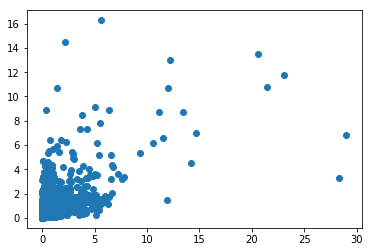

In [0]:
plt.scatter(test_y,Y_pred)


print('Mean Absolute Error:', metrics.mean_absolute_error(Y_pred,test_y))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_pred,test_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_pred,test_y)))

The plot doesnt give us much information. To understand the nature of just the test set, we plot the histogram

(array([3.156e+03, 7.500e+01, 1.300e+01, 4.000e+00, 5.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00]),
 array([1.0000e-02, 2.9110e+00, 5.8120e+00, 8.7130e+00, 1.1614e+01,
        1.4515e+01, 1.7416e+01, 2.0317e+01, 2.3218e+01, 2.6119e+01,
        2.9020e+01]),
 <a list of 10 Patch objects>)

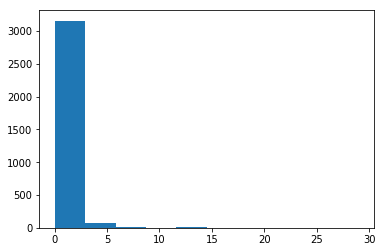

In [0]:
plt.hist(test_y)

The histogram reveals the unbalanced nature of the test set. So try log values of the test set.

Mean Absolute Error: 0.3749115887699245
Mean Squared Error: 1.5127035029477542
Root Mean Squared Error: 1.2299201205557027


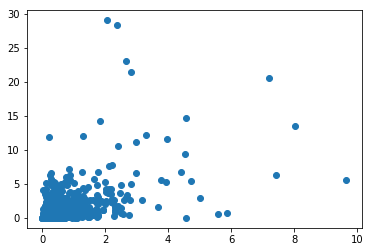

In [0]:
Y_pred_log=clf_log.predict(test_x)
Y_pred_log=np.exp(Y_pred_log)
plt.scatter(Y_pred_log,test_y)


print('Mean Absolute Error:', metrics.mean_absolute_error(Y_pred_log,test_y))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_pred_log,test_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_pred_log,test_y)))

In [0]:
x = df3.drop(["Global_Sales","Name","Year"],axis=1)

In [0]:
label = ["Platform","Genre","Publisher"]

In [0]:
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=0)

In [24]:

# Create a random forest Regressor
clf_new = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
clf_new.fit(train_x,train_y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [28]:
# Print the name and gini importance of each feature
for feature in zip(label, clf_new.feature_importances_):
    print(feature)

('Platform', 0.3211774896416817)
('Genre', 0.37486815628188813)
('Publisher', 0.30395435407643)


# **Conclusions**

From our analysis, there are major differences in the market share in terms of platforms and Genre. Given the limited data, the success of a new game depends on the **Genre**, by a small margin against Platform and Publisher, respectively.